In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the Data

performing a linear regression with one variable to predict profits for a food truck. 
The data contains 2 columns, population of a city (in 10,000s) and the profits of the food 
truck (in 10,000s).

In [2]:
data = pd.read_csv(r'D:\AI-DATASETS\01-MISC\ex1data1.txt', 
                   names = ['population', 'profit'])

In [3]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
## Split population and profit into X and y
X_df = pd.DataFrame(data.population)
y_df = pd.DataFrame(data.profit)

X = X_df['population'].values
y = y_df['profit'].values

## Length, or number of observations, in our data
no_samples = len(y_df)

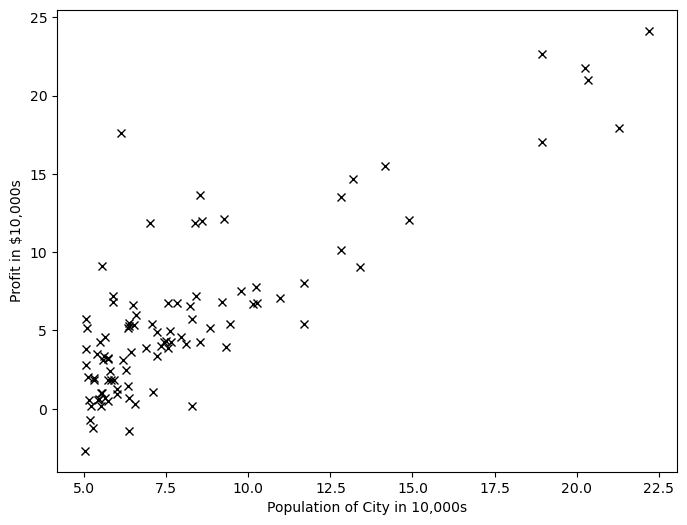

In [5]:
plt.figure(figsize=(8, 6))

plt.plot(X_df, y_df, 'kx')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

The idea of linear regression is to find a relationship between our target or dependent 
variable ($y$) and a set of explanatory variables ($x_1$, $x_2$ ...). 
This relatonship can then be used to predict other values.

multi-variable linear equation might look like this, where $w$ represents the coefficients, or weights, our model will try to learn.
$ f(x,y,z) = w_1 x + w_2 y + w_3 z$

In our case with one variable, this relationship is a line defined by parameters beta 
and the following form: profit = $w_1$.Population

#### cost function 

$$MSE =  \frac{1}{2N} \sum_{i=1}^{n} (y_i - (m x_i + b))^2$$

- N  is the total number of observations (data points)
- $\frac{1}{N} \sum_{i=1}^{n}$ is the mean
- $y_i$ is the actual value of an observation and $mx_i+b$ is our prediction


In [6]:
def compute_cost(X, y, coeffs):

    # number of training examples
    no_samples = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum(np.square(np.matmul(X, coeffs) - y)) / (2 * no_samples)
    
    return J

the data looks like this (sample)

| X  | y | $b_0$ | $b_1$ | $\hat{y} is b_0 + b_1. X$ | y - $\hat{y}$ |
| ---|---|-------|-------|--------------------------| --------------|
| .. | ..| ..    | ..    | ...                      | ...           |
| .. | ..| ..    | ..    | ...                      |...           |
| .. | ..| ..    | ..    | ...                      |...           |
| .. | ..| ..    | ..    | ...                      |...           |





#### gradient descent function

$$ \begin{split}\begin{align}
f'(m,b) =
  \begin{bmatrix}
    \frac{df}{dm}\\
    \frac{df}{db}\\
  \end{bmatrix}
&=
  \begin{bmatrix}
    \frac{1}{N} \sum -x_i \cdot 2(y_i - (mx_i + b)) \\
    \frac{1}{N} \sum -1 \cdot 2(y_i - (mx_i + b)) \\
  \end{bmatrix}\\
&=
  \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (mx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (mx_i + b)) \\
  \end{bmatrix}
\end{align}\end{split} 
$$

$$ \text{gradient} = - \frac{1}{\text{no_samples}} X(\text{targets} - \text{predictions})$$

In [7]:
def gradient_descent(X, y, coeffs, alpha, iterations):
    
    # number of training examples
    no_samples = len(y) 

    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(coeffs)
        loss       = hypothesis - y
        
        gradient = X.T.dot(loss)/no_samples
              
        coeffs = coeffs - alpha * gradient  # adjustment to beta values
        
        # Alternative
        #t0 = theta[0] - (alpha / no_samples) * np.sum( np.dot(X, theta) - y)
        #t1 = theta[1] - (alpha / no_samples) * np.sum((np.dot(X, theta) - y) * X[:, 1])     
        #theta = np.array([t0, t1])
        
        cost  = compute_cost(X, y, coeffs)
        
        cost_history[iteration] = cost

    return coeffs, cost_history



In [8]:
# Initialize
coeffs = np.array([0, 0])

X_1s    = np.c_[np.ones((len(X), 1)), X]
y      = y

#### test the cost function

In [9]:
cost = compute_cost(X_1s, y, coeffs)

print('coeffs:', coeffs)
print('cost  :', cost)

coeffs: [0 0]
cost  : 32.072733877455676


We’ll now minimize the cost using the __gradient descent__ algorithm. 

Intuitively, gradient descent takes small, linear hops down the slope of a function in each feature dimension, with the size of each hop determined by the partial derivative of the cost function with respect to that feature and a __learning rate__ multiplier __α__. 

In [10]:
iterations = 1500
alpha      = 0.01 # non-trivial parameter

In [11]:
(coeffs, cost_history) = gradient_descent(X_1s, y, coeffs, alpha, iterations)

In [12]:
print (coeffs)
print (cost_history[-1])

[-3.63029144  1.16636235]
4.483388256587726


In [13]:
np.array([7,   1])

array([7, 1])

In [14]:
## Prediction
print (np.array([[1, 7]]).dot(coeffs))
print (np.array([[1, 3]]).dot(coeffs))

[4.53424501]
[-0.13120439]


In [15]:
## Plotting the best fit line
best_fit_x = np.linspace(X.min(), X.max(), 200)
best_fit_y = [coeffs[0] + coeffs[1] * xx for xx in best_fit_x]

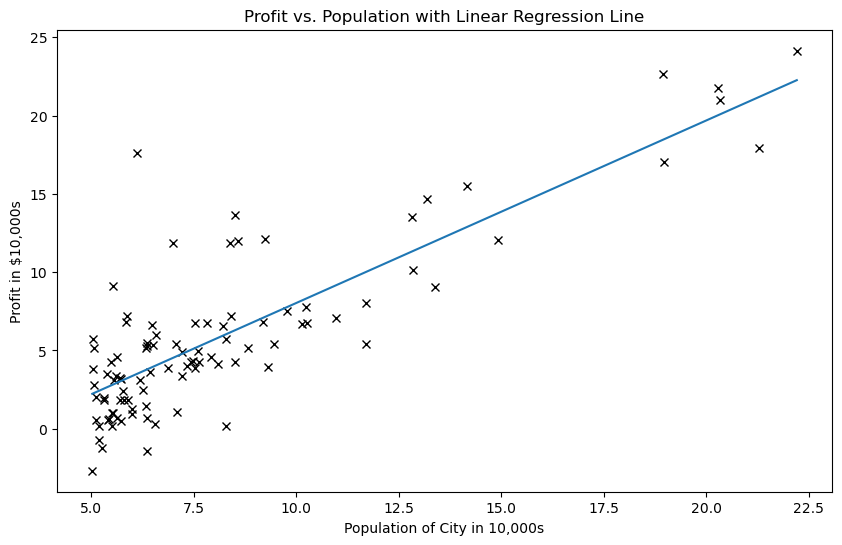

In [16]:
plt.figure(figsize=(10,6))

plt.plot(X, y, 'kx')
plt.plot(best_fit_x, best_fit_y, '-')

#plt.axis([0,25,-5,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs. Population with Linear Regression Line');

#### Use linear regression (sklearn)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_df, y_df)

y_pred = linreg.predict(X_df)

In [19]:
from sklearn import metrics

In [20]:
metrics.mean_squared_error(y_df, y_pred)

8.953942751950358

In [21]:
linreg.intercept_, linreg.coef_

(array([-3.89578088]), array([[1.19303364]]))

In [22]:
## make predictions
linreg.predict([[7]])

D:\Anaconda-16-FEB\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4.45545463]])

------------------------- STOP HERE -------------------------------

Iteration 1: Cost = 14.574422367900432
Iteration 2: Cost = 5.357989074447138
Iteration 3: Cost = 2.1828849747880215


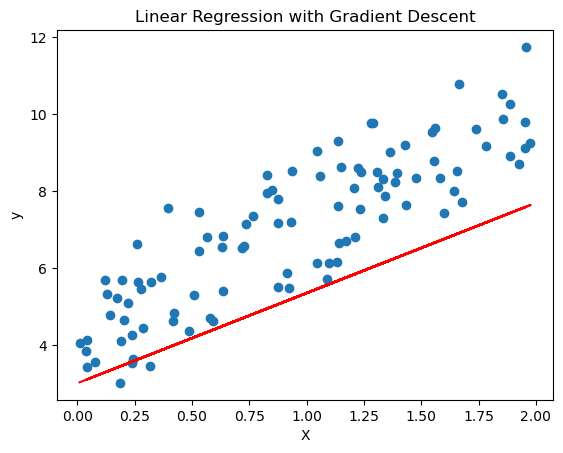

Coefficients (intercept and slope):
[[3.01261848]
 [2.3430567 ]]


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Gradient Descent parameters
eta = 0.1  # learning rate
n_iterations = 3
m = 100  # number of samples

# Initialize coefficients randomly
theta = np.random.randn(2,1)

# Perform Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    # Calculate cost function
    cost = np.sum((X_b.dot(theta) - y)**2) / (2 * m)
    print(f"Iteration {iteration+1}: Cost = {cost}")

# Plot the data and the fitted line
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.show()

print("Coefficients (intercept and slope):")
print(theta)

Iteration 1: MSE = 29.148844735800864
Iteration 2: MSE = 10.715978148894276
Iteration 3: MSE = 4.365769949576043


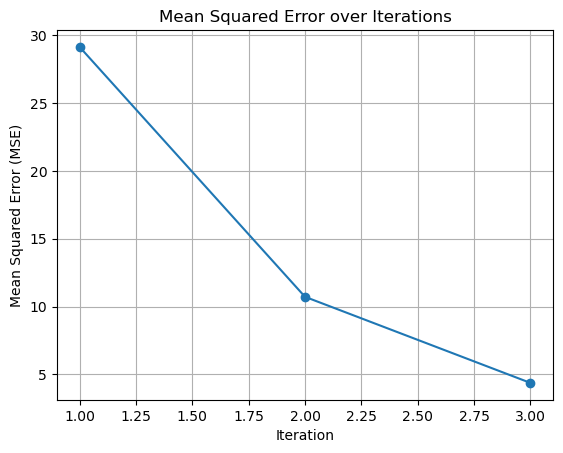

Coefficients (intercept and slope):
[[3.01261848]
 [2.3430567 ]]


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Gradient Descent parameters
eta = 0.1  # learning rate
n_iterations = 3
m = 100  # number of samples

# Initialize coefficients randomly
theta = np.random.randn(2,1)

# Arrays to store MSE values over iterations
mse_values = []

# Perform Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    # Calculate mean squared error (MSE)
    mse = np.sum((X_b.dot(theta) - y)**2) / m
    mse_values.append(mse)
    print(f"Iteration {iteration+1}: MSE = {mse}")

# Plot MSE over iterations
plt.plot(range(1, n_iterations + 1), mse_values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error over Iterations')
plt.grid(True)
plt.show()

print("Coefficients (intercept and slope):")
print(theta)


Iteration 1: MSE = 29.148844735800864
Iteration 2: MSE = 10.715978148894276
Iteration 3: MSE = 4.365769949576043


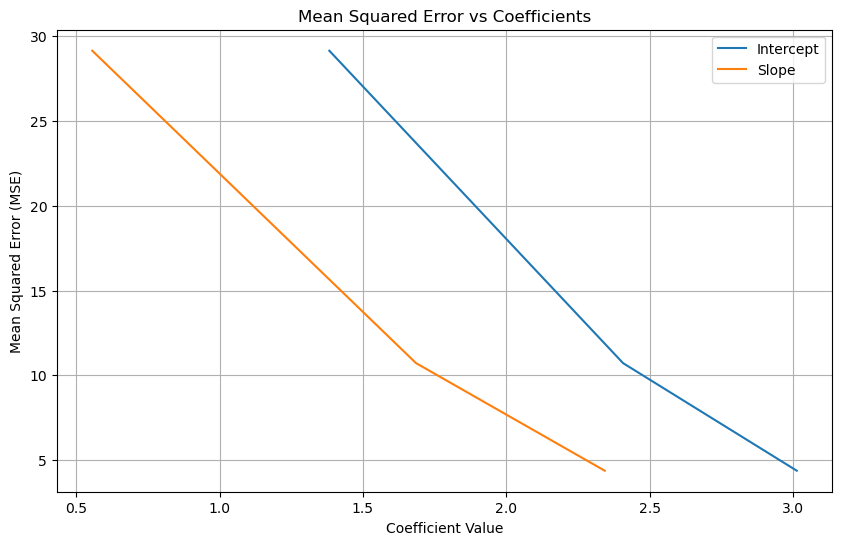

Final Coefficients (intercept and slope):
[[3.01261848]
 [2.3430567 ]]


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Gradient Descent parameters
eta = 0.1  # learning rate
n_iterations = 3
m = 100  # number of samples

# Initialize coefficients randomly
theta = np.random.randn(2,1)

# Arrays to store coefficient values and MSE values over iterations
coefficients = []
mse_values = []

# Perform Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    coefficients.append(theta.flatten())
    # Calculate mean squared error (MSE)
    mse = np.sum((X_b.dot(theta) - y)**2) / m
    mse_values.append(mse)
    print(f"Iteration {iteration+1}: MSE = {mse}")

coefficients = np.array(coefficients)

# Plot MSE with respect to coefficients
plt.figure(figsize=(10, 6))
plt.plot(coefficients[:, 0], mse_values, label='Intercept')
plt.plot(coefficients[:, 1], mse_values, label='Slope')
plt.xlabel('Coefficient Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs Coefficients')
plt.legend()
plt.grid(True)
plt.show()

print("Final Coefficients (intercept and slope):")
print(theta)


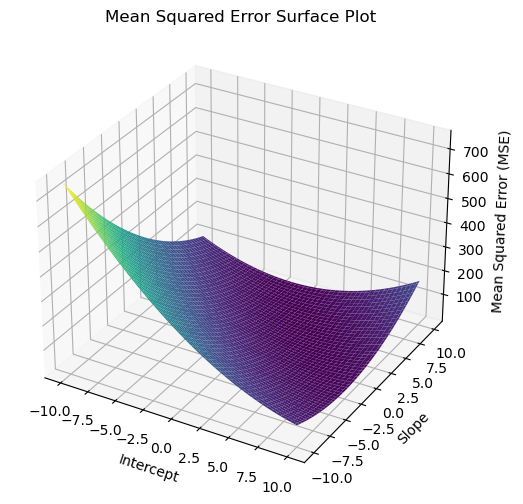

Optimal Coefficients (intercept and slope): 4.3434343434343425, 2.929292929292929
Minimum MSE: 1.0000452971837324


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Gradient Descent parameters
eta = 0.1  # learning rate
n_iterations = 30
m = 100  # number of samples

# Initialize coefficients randomly
theta0_range = np.linspace(-10, 10, 100)
theta1_range = np.linspace(-10, 10, 100)
theta0, theta1 = np.meshgrid(theta0_range, theta1_range)

# Arrays to store MSE values
mse_values = np.zeros((len(theta0_range), len(theta1_range)))

# Perform Gradient Descent
for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        theta = np.array([[theta0_range[i]], [theta1_range[j]]])
        mse_values[i, j] = np.sum((X_b.dot(theta) - y) ** 2) / m

# Plot surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0, theta1, mse_values, cmap='viridis')
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Mean Squared Error (MSE)')
ax.set_title('Mean Squared Error Surface Plot')
plt.show()

# Find the minimum MSE and corresponding coefficients
min_mse_index = np.unravel_index(np.argmin(mse_values, axis=None), mse_values.shape)
optimal_theta0 = theta0_range[min_mse_index[0]]
optimal_theta1 = theta1_range[min_mse_index[1]]
print(f"Optimal Coefficients (intercept and slope): {optimal_theta0}, {optimal_theta1}")
print(f"Minimum MSE: {mse_values.min()}")

